<a href="https://colab.research.google.com/github/tunahanayaz/Improved-Titanic-Disaster-Analysis/blob/main/Improved_Titanic_Disaster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = sns.load_dataset("titanic")
pd.set_option("display.max_columns",None)
pd.set_option("display.width", 500)

In [14]:
def check_df(dataframe, head = 5):
  print("############## Shape #############")
  print(dataframe.shape)
  print("############## Types #############")
  print(dataframe.dtypes)
  print("############## Head ##############")
  print(dataframe.head())
  print("############## Tail ##############")
  print(dataframe.tail())
  print("############## NA ##############")
  print(dataframe.isnull().sum())
  print("############## Quantiles ##############")
  print(dataframe.describe().T)

In [15]:
check_df(df)

############## Shape #############
(891, 15)
############## Types #############
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
############## Head ##############
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1

#EDA

In [16]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [17]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [18]:
df["sex"].nunique()

2

In [19]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]

In [20]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [21]:
num_but_cat = [col for col in df.columns if (df[col].nunique() < 10) & ((df[col].dtype) in ["int64","float64"])]

In [22]:
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [23]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object"]]

In [24]:
cat_but_car

[]

In [25]:
cat_cols = cat_cols + num_but_cat

In [26]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [27]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [28]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [29]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [32]:
def cat_summary(dataframe, col_name):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("######################################")

In [33]:
cat_summary(df,"sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
######################################


In [34]:
for col in cat_cols:
  cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
######################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
######################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
######################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
######################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
######################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
######################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
######################################
     a

In [35]:
def cat_summary(dataframe, col_name, plot = False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("######################################")

  if plot:
    sns.countplot(x=dataframe[col_name],data = dataframe)
    plt.show(block=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
######################################


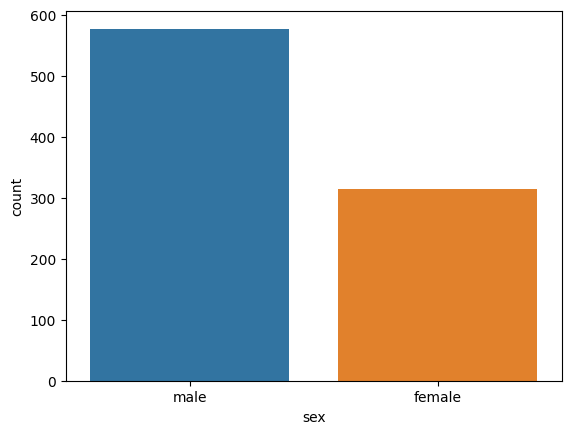

In [36]:
cat_summary(df,"sex",plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
######################################


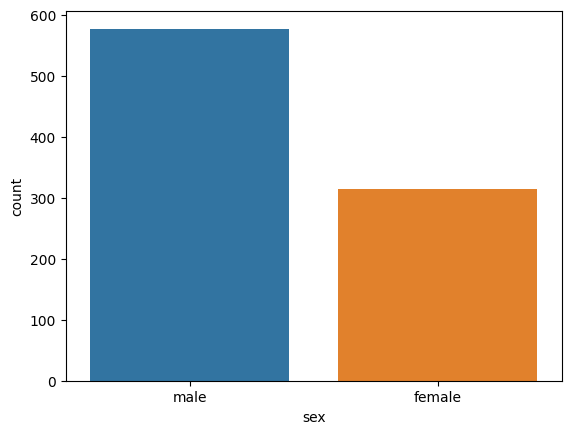

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
######################################


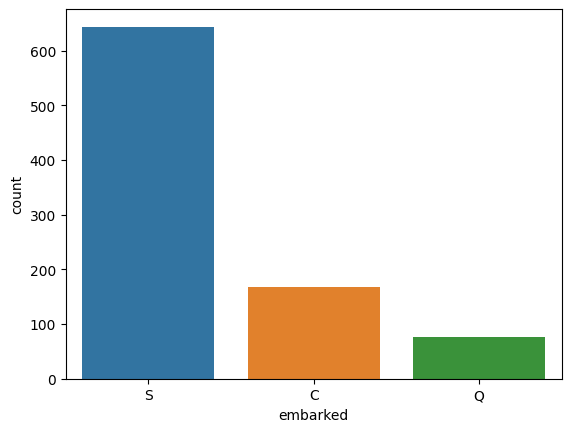

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
######################################


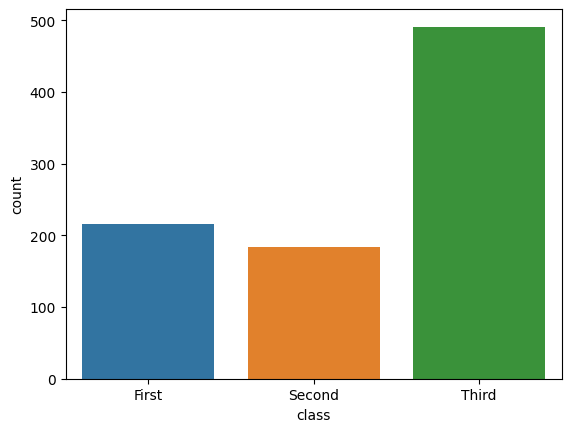

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
######################################


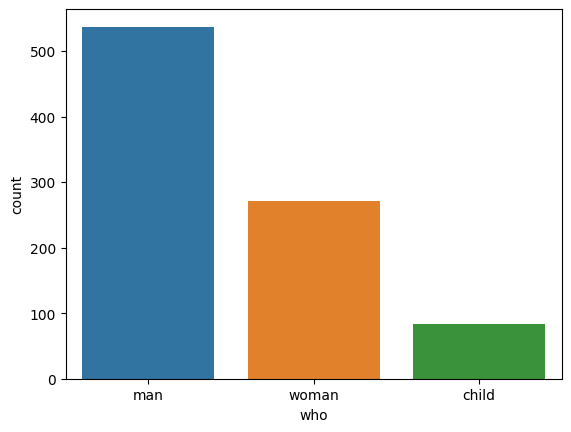

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
######################################


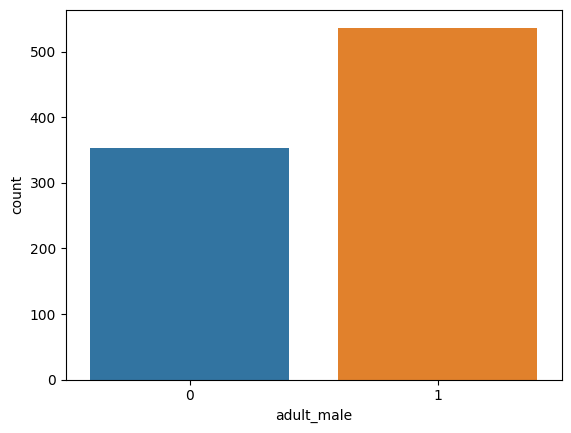

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
######################################


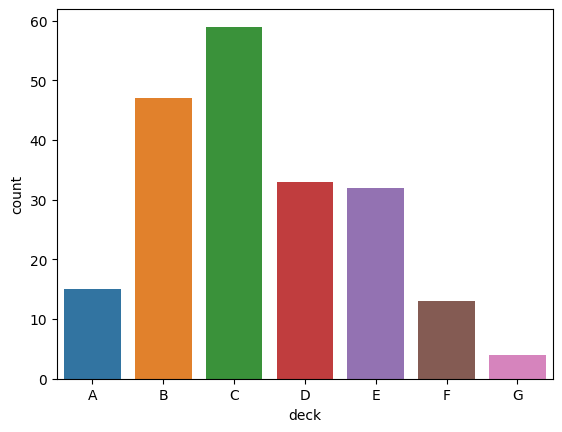

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
######################################


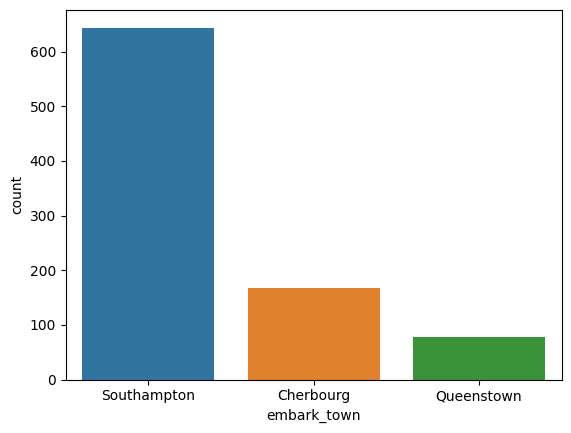

     alive      Ratio
no     549  61.616162
yes    342  38.383838
######################################


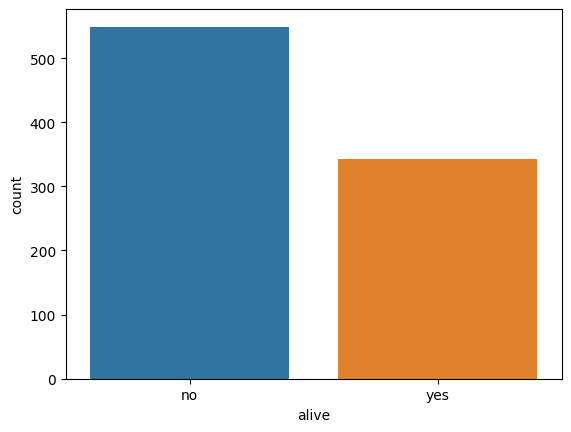

   alone     Ratio
1    537  60.26936
0    354  39.73064
######################################


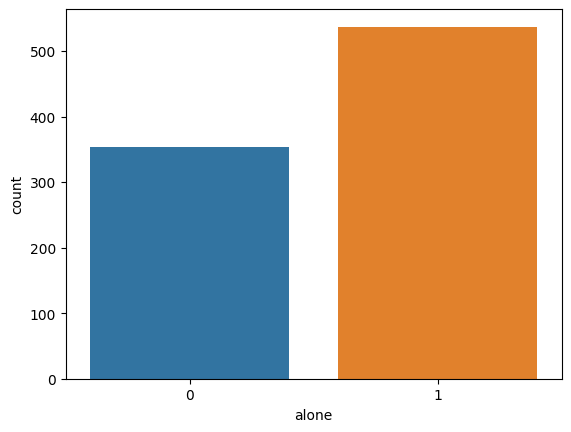

   survived      Ratio
0       549  61.616162
1       342  38.383838
######################################


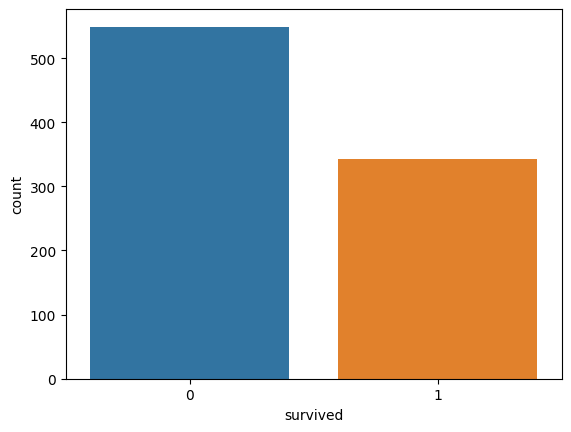

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
######################################


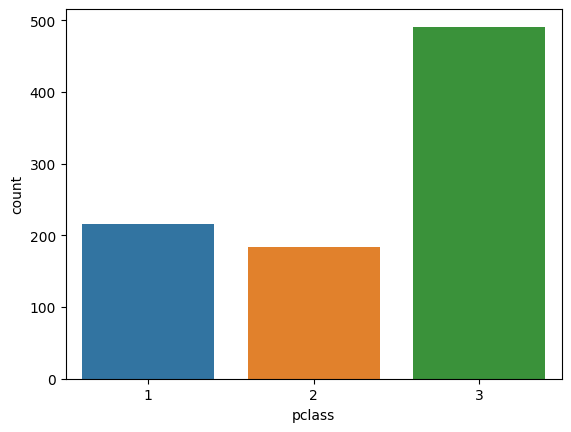

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
######################################


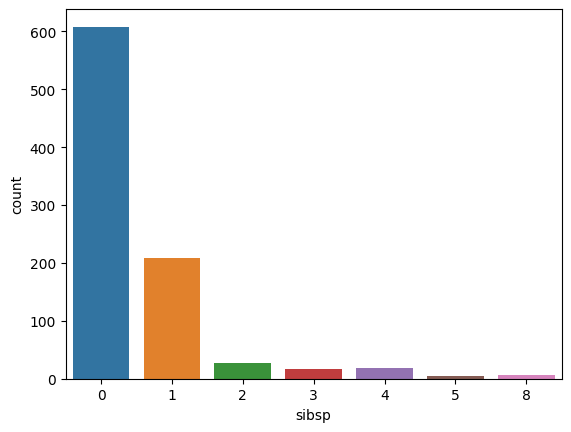

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
######################################


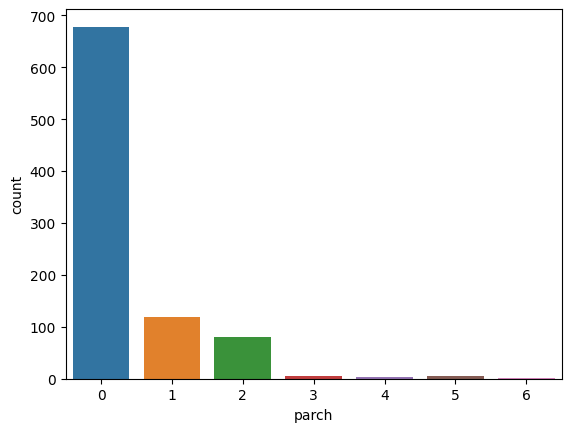

In [37]:
for col in cat_cols:
  if df[col].dtypes =="bool":
    df[col] = df[col].astype(int)
    cat_summary(df,col,plot=True)

  else:
    cat_summary(df,col, plot=True)

In [38]:
def cat_summary(dataframe, col_name, plot = False):
  if dataframe[col_name].dtypes == "bool":
    dataframe[col_name] = dataframe[col_name].astype(int)

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("######################################")

    if plot:
      sns.countplot(x=dataframe[col_name],data = dataframe)
      plt.show(block=True)
  else:
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("######################################")
    if plot:
      sns.countplot(x=dataframe[col_name],data = dataframe)
      plt.show(block=True)

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
######################################


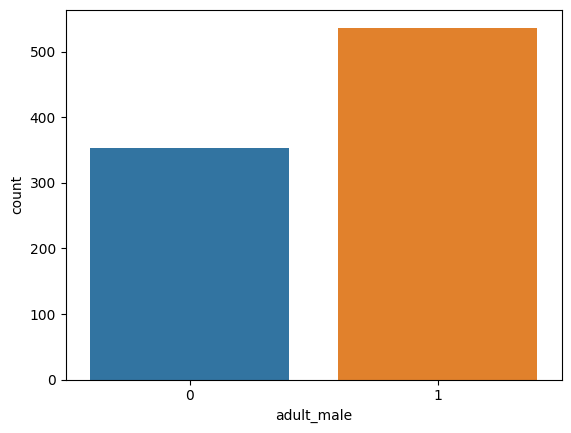

In [39]:
cat_summary(df, "adult_male", plot=True)

In [40]:
df[["age","fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [41]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]

In [42]:
num_cols = [col for col in df.columns if col not in cat_cols]

In [43]:
num_cols

['age', 'fare']

In [44]:
def num_summary(dataframe, numerical_col):
  quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
  print(dataframe[numerical_col].describe(quantiles).T)

In [45]:
num_summary(df, "age")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
max       80.000000
Name: age, dtype: float64


In [46]:
for col in num_cols:
  num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
max      512.329200
Name: fare, dtype: float64


In [47]:
def num_summary(dataframe, numerical_col, plot = False):
  quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
  print(dataframe[numerical_col].describe(quantiles).T)
  if plot:
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
max       80.000000
Name: age, dtype: float64


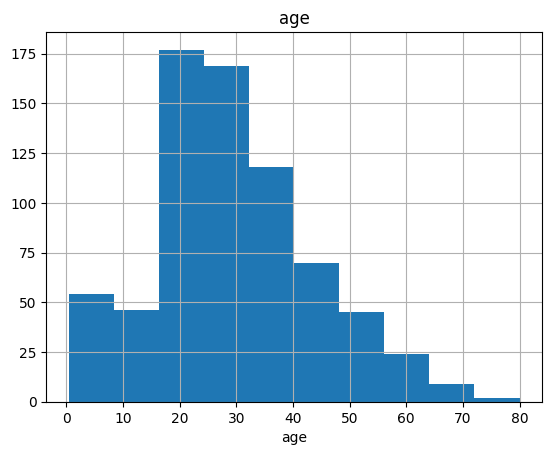

In [48]:
num_summary(df,"age", plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
max       80.000000
Name: age, dtype: float64


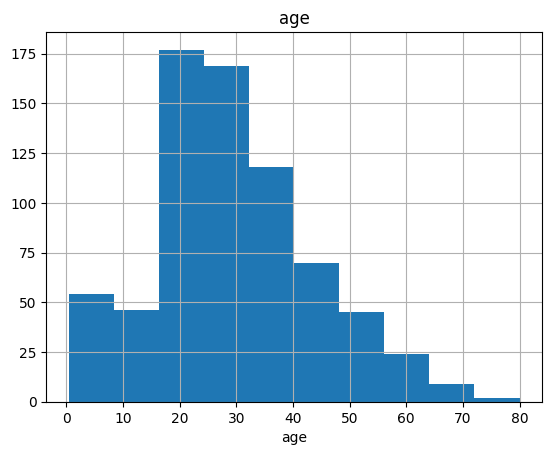

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
max      512.329200
Name: fare, dtype: float64


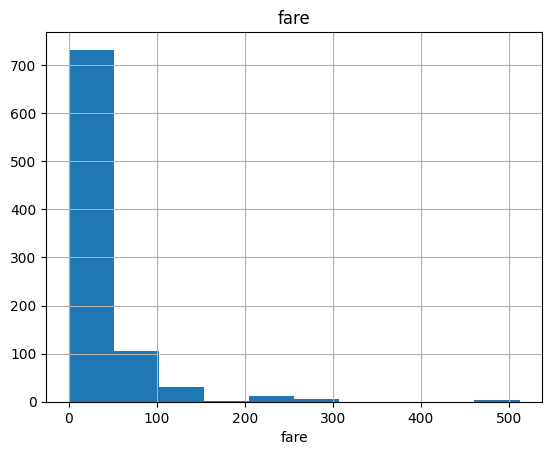

In [49]:
for col in num_cols:
  num_summary(df,col,plot=True)

# Capturing Variables and Generalizing Operations

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int64   
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


In [51]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  """
  docstring oluşturma
  Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir...

  Parameters
  --------
  dataframe: dataframe
    değişken isimleri alınmak istenen dataframe'dir
  cat_th: int, float
    numerik fakat ketogorik olan değişkenler için sınıf eşik değeri
  car_th: int, float
    kategorik fakat kardinal değişkenler için sınıf eşik değeri

  Returns
  -----
  cat_cols: list
    Kategorik değişken listesi
  num_cols: list
    Numerik değişken listesi
  cat_but_car: list
    Kategorik görünümlü kardinal değişken listesi

  NOTES
  --------
  cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.
  """
  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]

  num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]

  cat_but_car = [col for col in df.columns if
                 df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [52]:
help(grab_col_names)

Help on function grab_col_names in module __main__:

grab_col_names(dataframe, cat_th=10, car_th=20)
    docstring oluşturma
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir...
    
    Parameters
    --------
    dataframe: dataframe
      değişken isimleri alınmak istenen dataframe'dir
    cat_th: int, float
      numerik fakat ketogorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
      kategorik fakat kardinal değişkenler için sınıf eşik değeri
    
    Returns
    -----
    cat_cols: list
      Kategorik değişken listesi
    num_cols: list
      Numerik değişken listesi
    cat_but_car: list
      Kategorik görünümlü kardinal değişken listesi
    
    NOTES
    --------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
      num_but_cat cat_cols'un içerisinde.



In [53]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 6


In [54]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'deck',
 'embark_town',
 'alive',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'adult_male',
 'alone']

In [55]:
num_cols

['age', 'fare']

In [56]:
cat_but_car

[]

In [57]:
def cat_summary(dataframe, col_name):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("######################################")

In [58]:
cat_summary(df,"sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
######################################


In [59]:
for col in cat_cols:
  cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
######################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
######################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
######################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
######################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
######################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
######################################
     alive      Ratio
no     549  61.616162
yes    342  38.383838
######################################
   survived      Ratio
0

In [60]:
def num_summary(dataframe, numerical_col, plot = False):
  quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
  print(dataframe[numerical_col].describe(quantiles).T)
  if plot:
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
max       80.000000
Name: age, dtype: float64


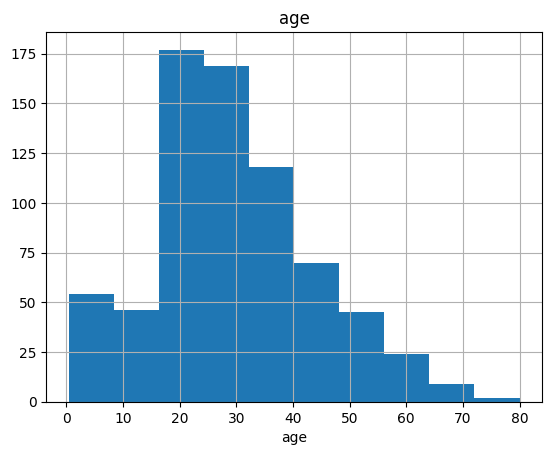

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
max      512.329200
Name: fare, dtype: float64


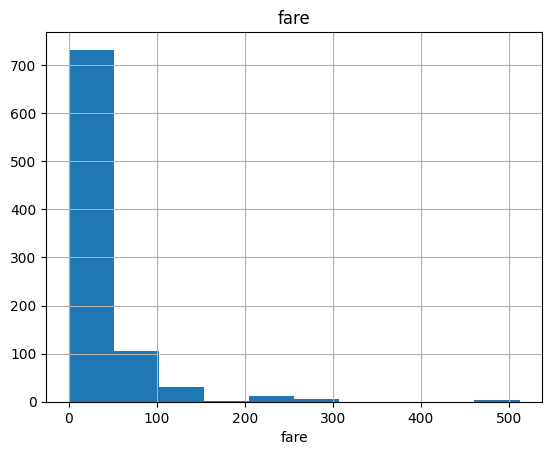

In [61]:
for col in num_cols:
  num_summary(df, col, plot=True)

In [ ]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'deck',
 'embark_town',
 'alive',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'adult_male',
 'alone']

In [62]:
def cat_summary(dataframe, col_name, plot = False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("######################################")

  if plot:
    sns.countplot(x=dataframe[col_name],data = dataframe)
    plt.show(block=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
######################################


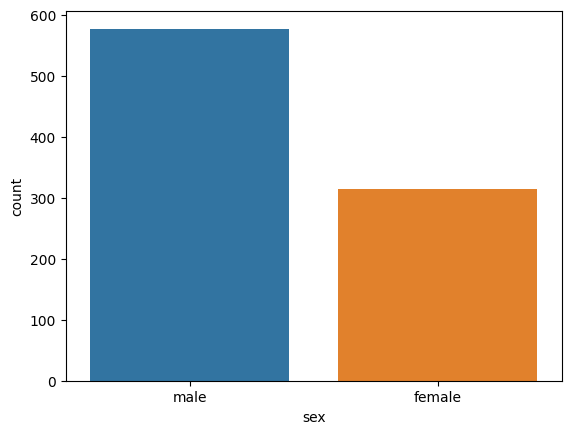

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
######################################


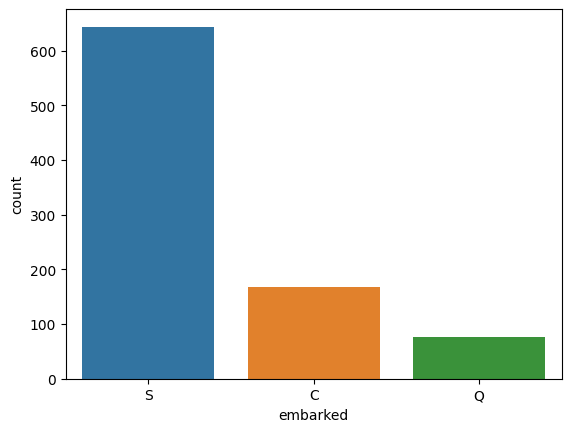

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
######################################


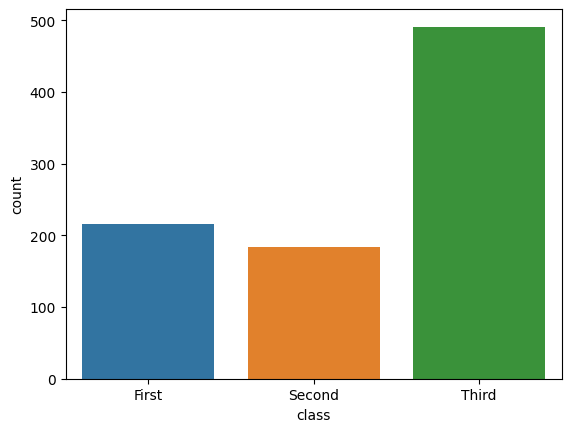

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
######################################


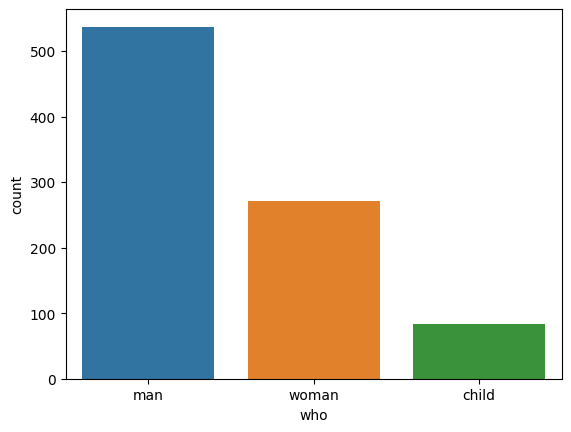

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
######################################


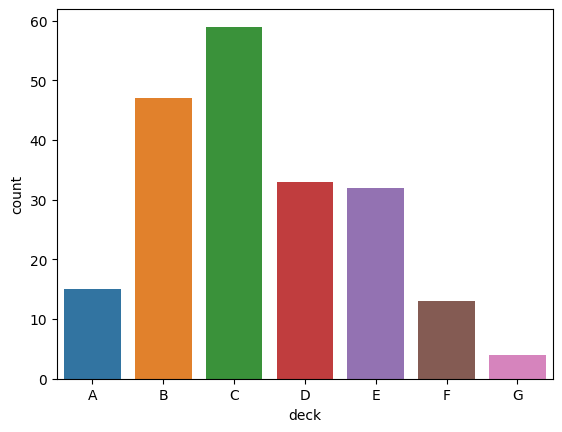

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
######################################


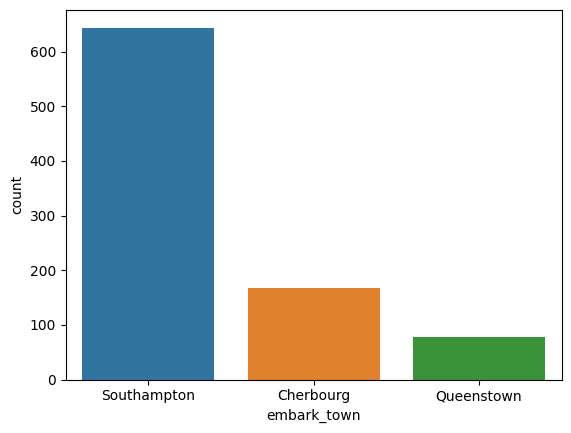

     alive      Ratio
no     549  61.616162
yes    342  38.383838
######################################


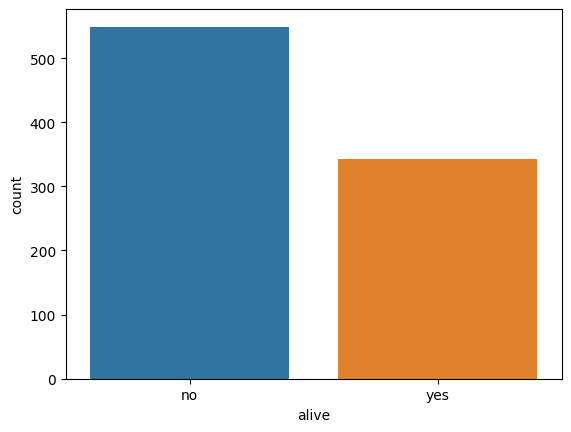

   survived      Ratio
0       549  61.616162
1       342  38.383838
######################################


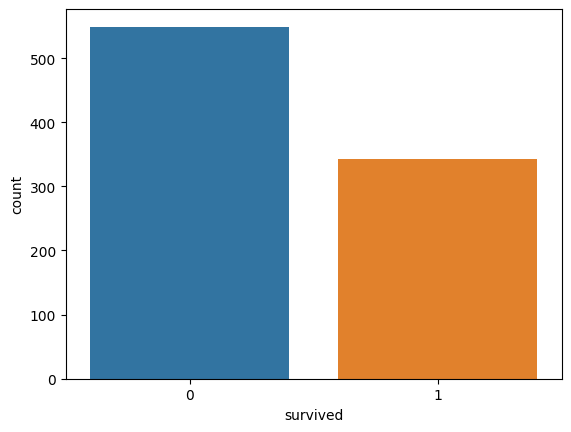

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
######################################


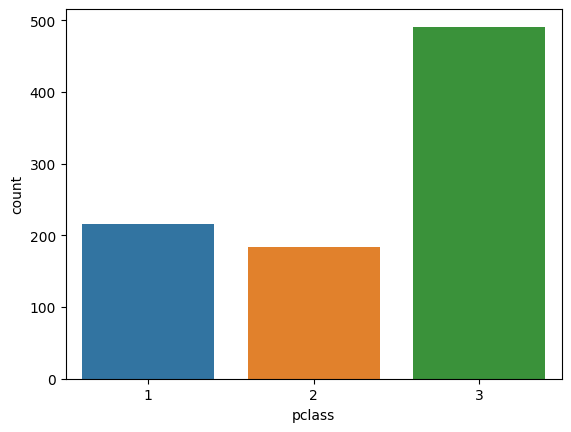

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
######################################


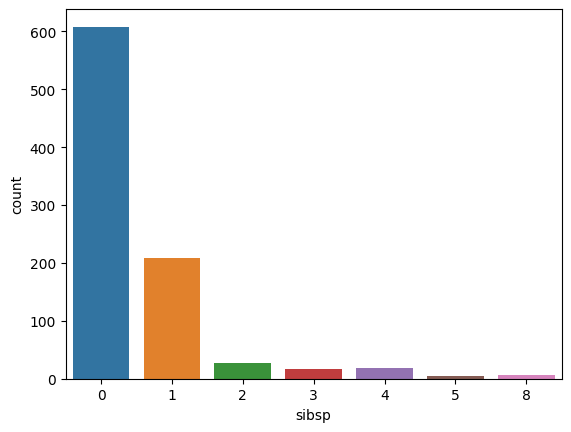

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
######################################


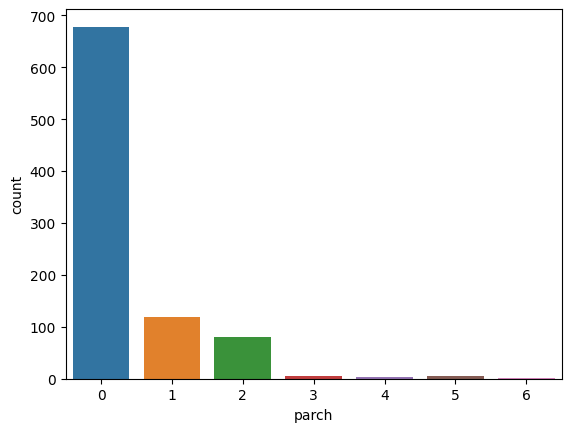

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
######################################


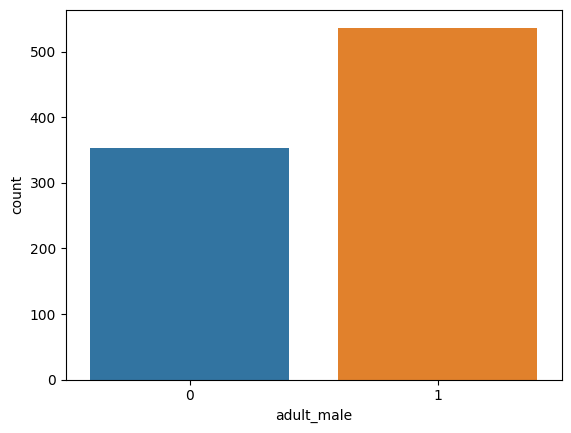

   alone     Ratio
1    537  60.26936
0    354  39.73064
######################################


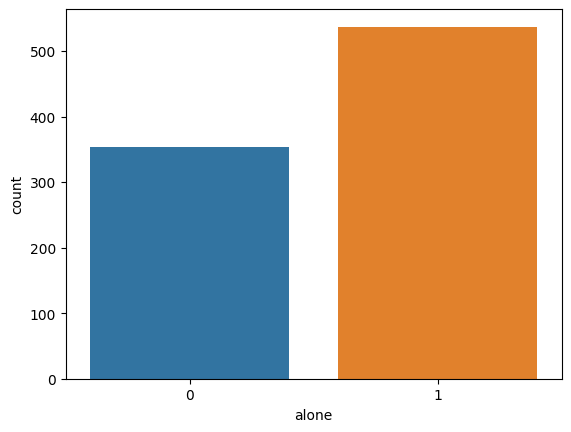

In [63]:
for col in cat_cols:
  cat_summary(df, col, plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
max       80.000000
Name: age, dtype: float64


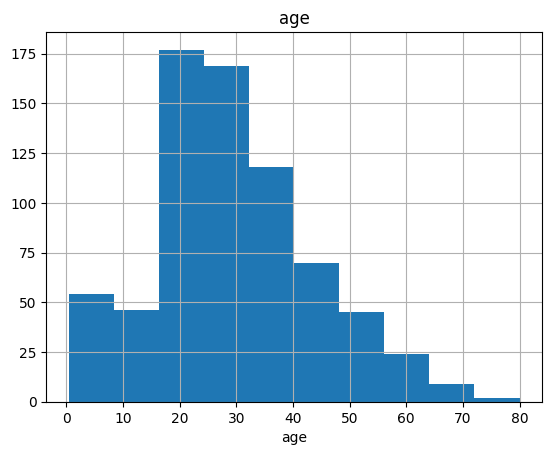

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
max      512.329200
Name: fare, dtype: float64


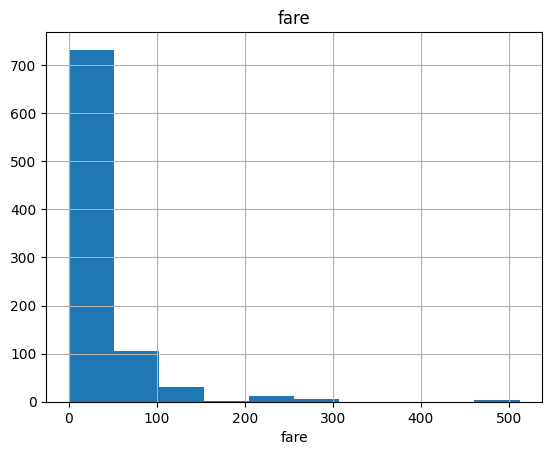

In [64]:
for col in num_cols:
  num_summary(df, col, plot=True)

# Analysis of Target Variable

In [67]:
for col in df.columns:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype(int)

In [68]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 6


In [70]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [69]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [71]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))

In [72]:
target_summary_with_cat(df, "survived","sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


In [73]:
target_summary_with_cat(df, "survived","pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363


In [74]:
for col in cat_cols:
  target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no             0.0
yes            1.0
          TARGET_MEAN
survived             
0                 0.0
1                 1.0
        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363
       TARGET_MEAN
sibsp             
0         0.345395
1      

In [75]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [76]:
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [77]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}), end= "\n\n\n")

In [78]:
target_summary_with_num(df, "survived", "age")

                age
survived           
0         30.626179
1         28.343690




In [79]:
for col in num_cols:
  target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408


